# Comparison of Symbolic Defaults to Constant Default and Random Search

Produces an image similar to:

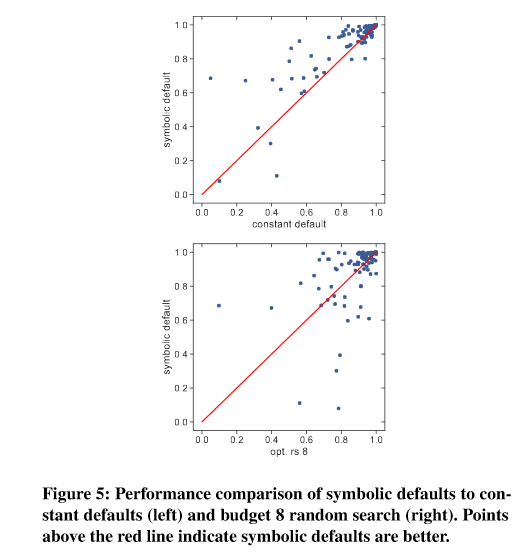

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [69]:
import os
os.mkdir("generated/Figure5")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'generated/Figure5'

In [70]:
surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
all_methods = pd.concat([surrogate_performance, opt_random_search])

In [71]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["optimizer"] = all_methods.apply(category_from_row, axis=1)

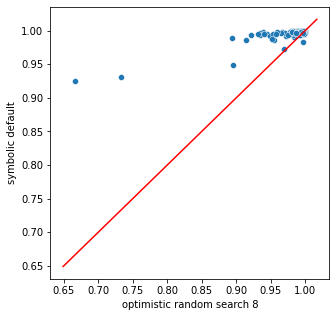

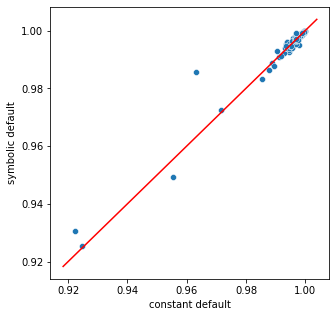

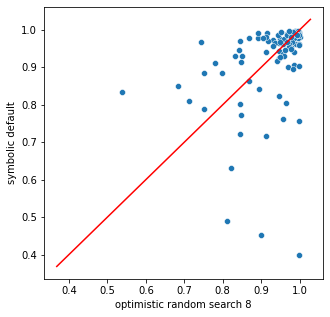

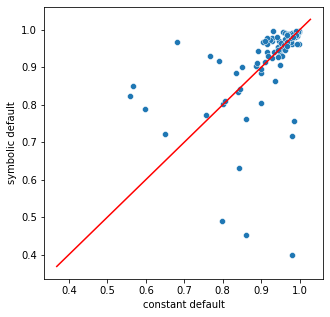

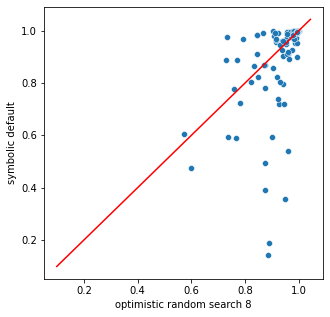

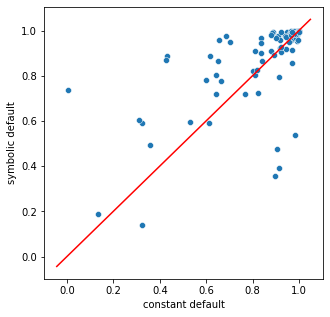

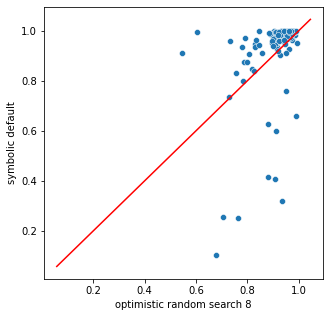

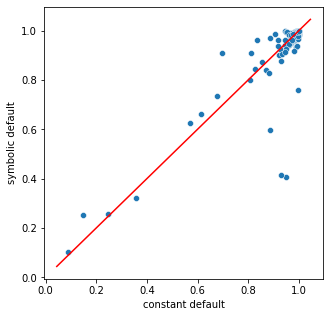

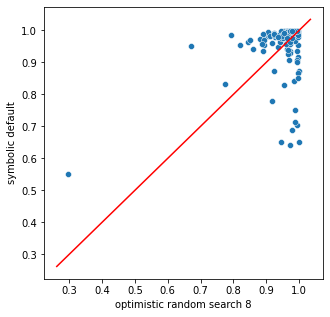

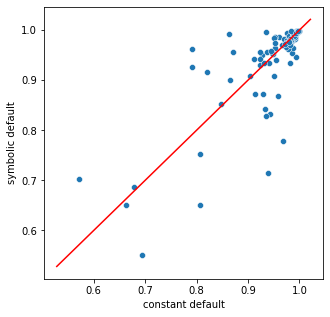

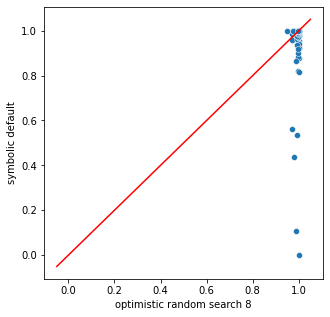

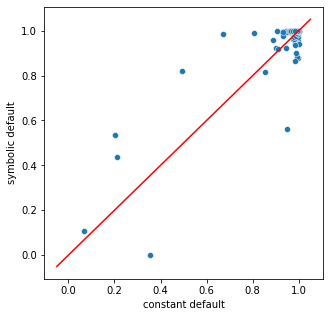

In [72]:
for learner in all_methods.learner.unique():
    results = all_methods[all_methods.learner == learner]
    results = results.pivot(index='task', columns='optimizer', values='surrogate_score')
    
    for comparison_method in ["optimistic random search 8", "constant default"]:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
        sns.scatterplot(data=results, x=comparison_method, y="symbolic default", ax=ax)
        ylim = ax.get_ylim()
        xlim = ax.get_xlim()
        square_lim = (min(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
        sns.lineplot(x=square_lim, y=square_lim, color='red', ax=ax)
        figpath = f"generated/Figure5/{learner}_symbolic_v_{comparison_method.replace(' ','_')}.pdf"
        plt.savefig(figpath, bbox_inches='tight', pad_inches=.1)